In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv') 

print(f"Store Data: {store_df.shape}")
print(f"Train Data: {train_df.shape}")
print(f"Test Data: {test_df.shape}")
store_df.head()


Store Data: (1115, 10)
Train Data: (1017209, 9)
Test Data: (41088, 9)


C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\750137346.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
store_df.info()
store_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [4]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [5]:
print("store null----")
print(store_df.isnull().sum())
print("train null----")
print(train_df.isnull().sum())
print("test null-----")
print(test_df.isnull().sum())
print("test null-----")

store_df['PromoInterval']

store null----
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
train null----
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
test null-----
Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64
test null-----


0                    NaN
1        Jan,Apr,Jul,Oct
2        Jan,Apr,Jul,Oct
3                    NaN
4                    NaN
              ...       
1110     Jan,Apr,Jul,Oct
1111                 NaN
1112                 NaN
1113                 NaN
1114    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1115, dtype: object

Step 2: Handling Missing Data

In [6]:
# `store_df`

# Fill missing CompetitionDistance with median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

# Fill missing CompetitionOpenSinceMonth and Year with 0 (assume no competition if missing)
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionDistance'].mode(), inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionDistance'].mode(), inplace=True)

# Fill missing Promo2-related columns (assume no promotion if missing)
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna('None', inplace=True)

# Step 2.1: Encode PromoInterval
store_df['PromoInterval'] = store_df['PromoInterval'].replace('None', 'NoPromo')
store_df['PromoInterval'] = store_df['PromoInterval'].astype('category')  # Convert to categorical for analysis
print("Unique PromoIntervals after encoding:", store_df['PromoInterval'].unique())

# Verify if missing data is handled
print("Updated missing values in store_df:")
print(store_df.isnull().sum())


Unique PromoIntervals after encoding: ['NoPromo', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']
Categories (4, object): ['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec', 'NoPromo']
Updated missing values in store_df:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64


C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\1798479901.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\1798479901.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

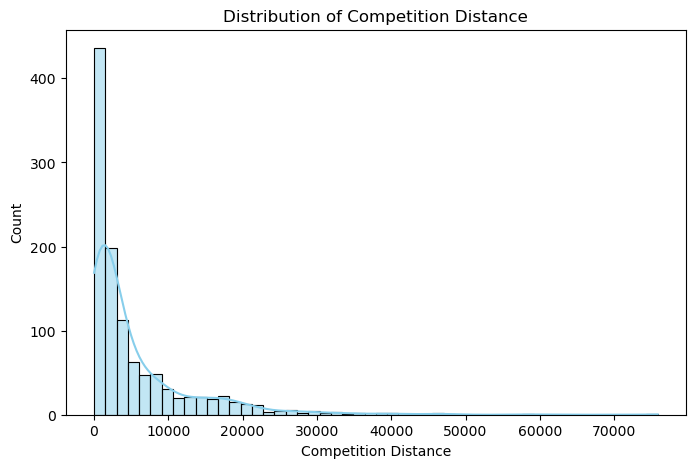

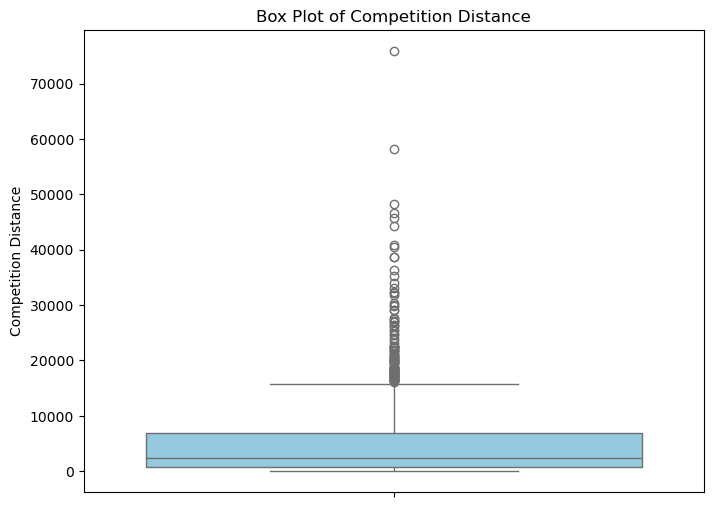

C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\2566684362.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo2', data=store_df, palette='Set2')


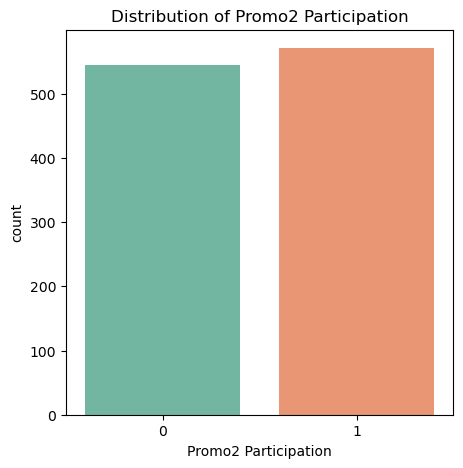

Missing values in test_df after handling:
Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                 0
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64


C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\2566684362.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Open'].fillna(test_df['Open'].mode()[0], inplace=True)


In [7]:
# Step 2.2: Analyze Key Features
# Distribution of CompetitionDistance
plt.figure(figsize=(8, 5))
sns.histplot(store_df['CompetitionDistance'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of Competition Distance")
plt.xlabel("Competition Distance")
plt.show()

# Box plot for CompetitionDistance
plt.figure(figsize=(8, 6))
sns.boxplot(data=store_df, y='CompetitionDistance', color='skyblue')
plt.title("Box Plot of Competition Distance")
plt.ylabel("Competition Distance")
plt.show()


# Count of Promo2 (binary)
plt.figure(figsize=(5, 5))
sns.countplot(x='Promo2', data=store_df, palette='Set2')
plt.title("Distribution of Promo2 Participation")
plt.xlabel("Promo2 Participation")
plt.show()

# Step 2.3: Handle Missing Data in `test_df`
# Fill missing 'Open' values with the mode (most frequent value)
test_df['Open'].fillna(test_df['Open'].mode()[0], inplace=True)

# Verify missing values in test_df after imputation
print("Missing values in test_df after handling:")
print(test_df.isnull().sum())


Step 3 merge datasets

In [8]:
# Step 4.1: Left join store_df with train_df and test_df
train_df = train_df.merge(store_df, how='left', on='Store')
test_df = test_df.merge(store_df, how='left', on='Store')

print(test_df['Date'])

# Verify the structure of the merged datasets
print("Train Dataset After Merge:")
print(train_df.info())

print("\nTest Dataset After Merge:")
print(test_df.info())


0        17/09/2015
1        17/09/2015
2        17/09/2015
3        17/09/2015
4        17/09/2015
            ...    
41083    01/08/2015
41084    01/08/2015
41085    01/08/2015
41086    01/08/2015
41087    01/08/2015
Name: Date, Length: 41088, dtype: object
Train Dataset After Merge:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int64   
 1   DayOfWeek                  1017209 non-null  int64   
 2   Date                       1017209 non-null  object  
 3   Sales                      1017209 non-null  int64   
 4   Customers                  1017209 non-null  int64   
 5   Open                       1017209 non-null  int64   
 6   Promo                      1017209 non-null  int64   
 7   StateHoliday               1017209 non-null  object  
 8   Scho

EDA

We will analyze:

    Sales Trends Over Time
    Impact of State Holidays
    Impact of Promotions

C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\1677202951.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_df['Date'] = pd.to_datetime(train_df['Date'])


0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]
0        17/09/2015
1        17/09/2015
2        17/09/2015
3        17/09/2015
4        17/09/2015
            ...    
41083    01/08/2015
41084    01/08/2015
41085    01/08/2015
41086    01/08/2015
41087    01/08/2015
Name: Date, Length: 41088, dtype: object


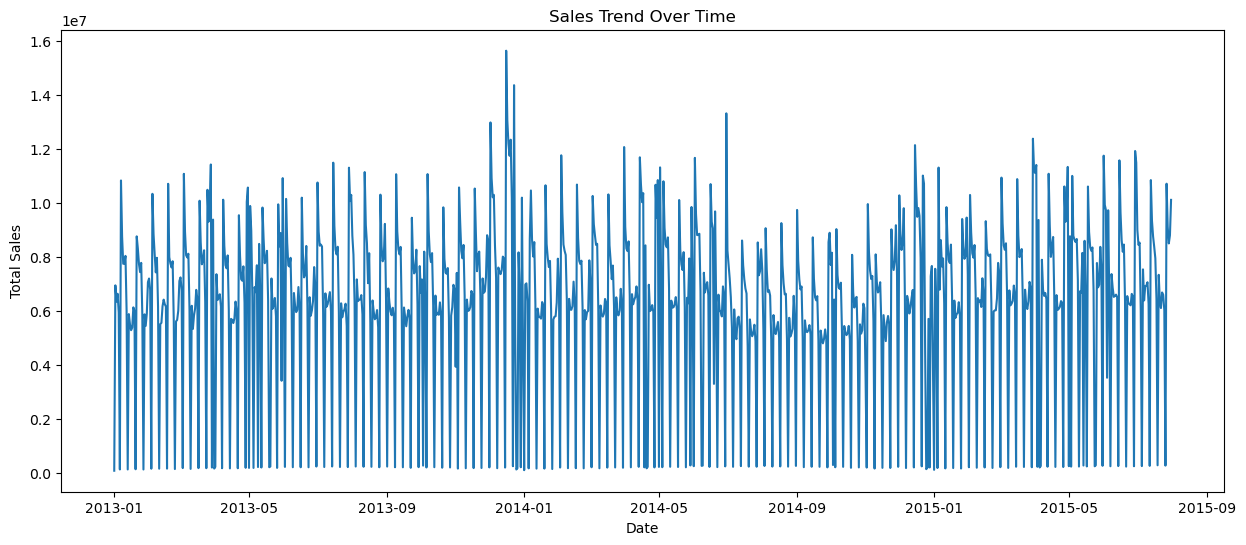

C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\1677202951.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales, palette='viridis')


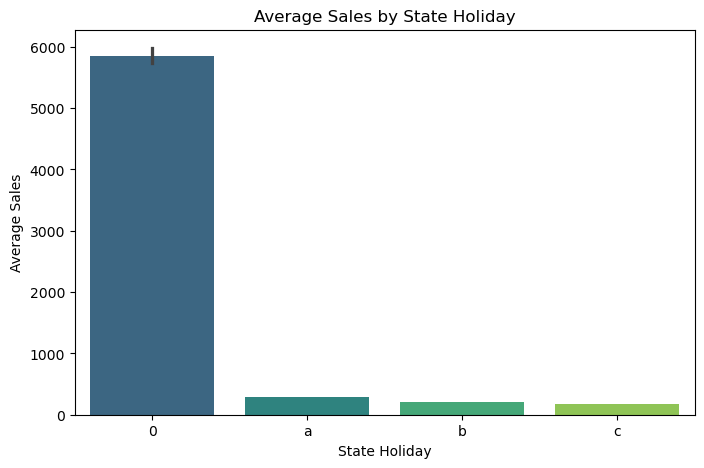

C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\1677202951.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Promo', y='Sales', data=train_df, palette='plasma', scale='width', inner='box')
C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\1677202951.py:39: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Promo', y='Sales', data=train_df, palette='plasma', scale='width', inner='box')


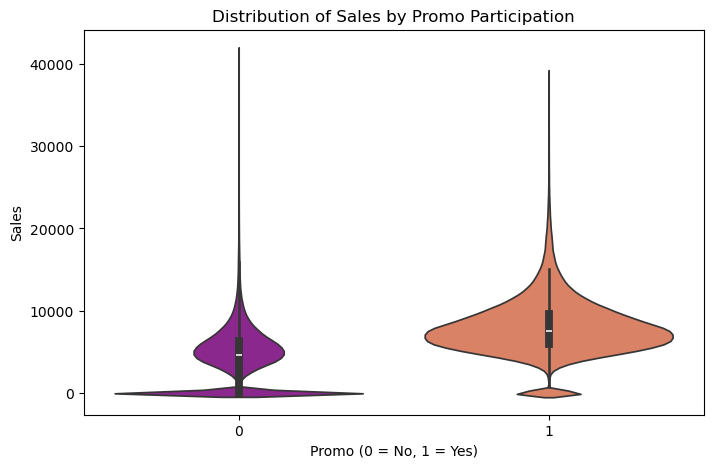

In [9]:

# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date is in datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
print(train_df['Date'])
print(test_df['Date'])

# 1. Sales Trends Over Time
plt.figure(figsize=(15, 6))
sales_trend = train_df.groupby('Date')['Sales'].sum().reset_index()
sns.lineplot(x='Date', y='Sales', data=sales_trend)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# 2. Impact of State Holidays
plt.figure(figsize=(8, 5))
holiday_sales = train_df.groupby('StateHoliday')['Sales'].mean().reset_index()
sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales, palette='viridis')
plt.title("Average Sales by State Holiday")
plt.xlabel("State Holiday")
plt.ylabel("Average Sales")
plt.show()

# 3. Impact of Promotions
# plt.figure(figsize=(8, 5))
# promo_sales = train_df.groupby('Promo')['Sales'].mean().reset_index()
# sns.barplot(x='Promo', y='Sales', data=promo_sales, palette='plasma')
# plt.title("Average Sales by Promo Participation")
# plt.xlabel("Promo")
# plt.ylabel("Average Sales")
# plt.show()

plt.figure(figsize=(8, 5))
# promo_sales = train_df.groupby('Promo')['Sales'].mean().reset_index()
sns.violinplot(x='Promo', y='Sales', data=train_df, palette='plasma', scale='width', inner='box')
plt.title("Distribution of Sales by Promo Participation")
plt.xlabel("Promo (0 = No, 1 = Yes)")
plt.ylabel("Sales")
plt.show()



C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\2567263945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='pastel')


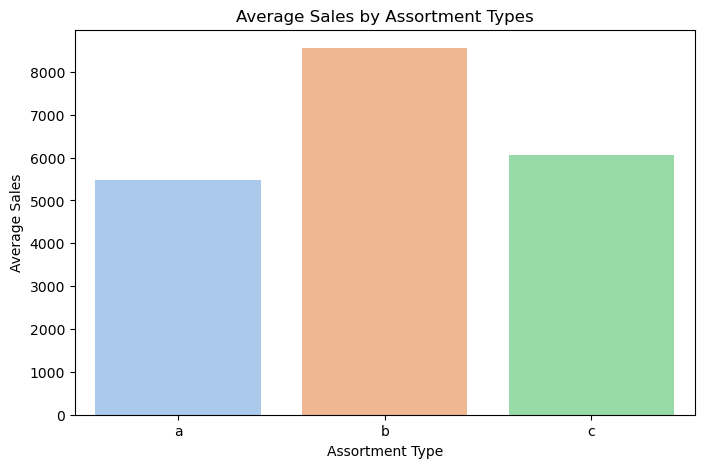

C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\2567263945.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StoreType', y='Sales', data=storetype_sales, palette='coolwarm')


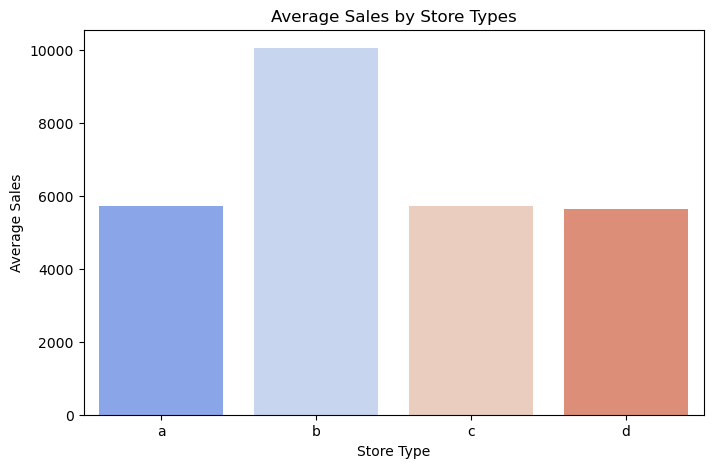

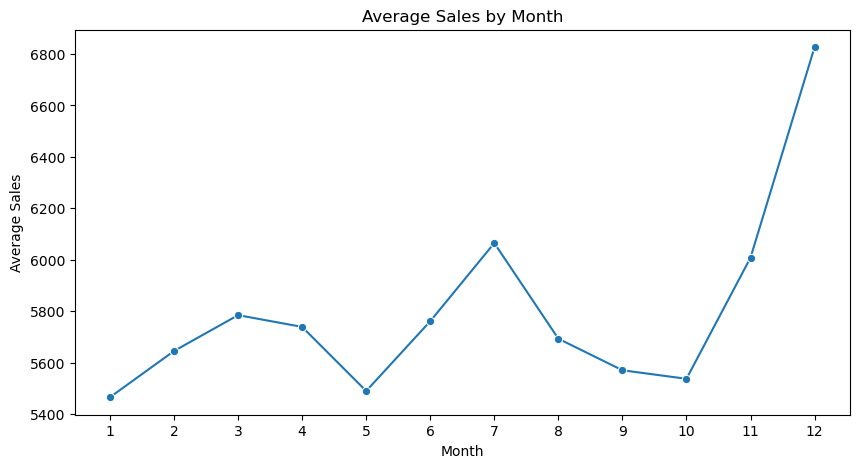

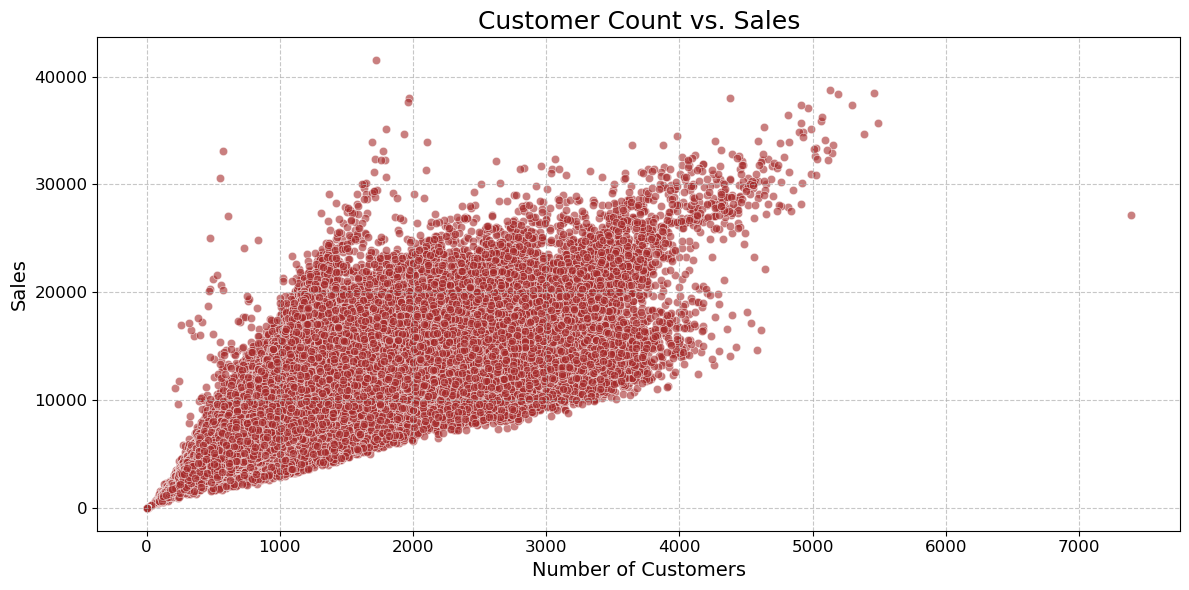

In [10]:
# Step 5.1: Sales by Assortment Types
plt.figure(figsize=(8, 5))
assortment_sales = train_df.groupby('Assortment')['Sales'].mean().reset_index()
sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='pastel')
plt.title("Average Sales by Assortment Types")
plt.xlabel("Assortment Type")
plt.ylabel("Average Sales")
plt.show()

# Step 5.2: Sales by Store Types
plt.figure(figsize=(8, 5))
storetype_sales = train_df.groupby('StoreType')['Sales'].mean().reset_index()
sns.barplot(x='StoreType', y='Sales', data=storetype_sales, palette='coolwarm')
plt.title("Average Sales by Store Types")
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.show()

# Step 5.3: Seasonality Analysis
# Extract month, year, and quarter from the Date column
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year
train_df['Quarter'] = train_df['Date'].dt.quarter

# Sales by Month
plt.figure(figsize=(10, 5))
monthly_sales = train_df.groupby('Month')['Sales'].mean().reset_index()
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13))
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_df, alpha=0.6, color='brown')
plt.title('Customer Count vs. Sales', fontsize=18)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Generating Promotional Indicators

In [11]:

# Step : DaysSinceLastPromo - Calculate days since the last known promotion
train_df['Promo2StartDate'] = pd.to_datetime(train_df['Promo2SinceYear'].fillna(0).astype(int).astype(str) + '-' +
                                             train_df['Promo2SinceWeek'].fillna(0).astype(int).astype(str) + '-1', 
                                             errors='coerce', format='%Y-%W-%w')
train_df['DaysSinceLastPromo'] = (train_df['Date'] - train_df['Promo2StartDate']).dt.days
train_df['DaysSinceLastPromo'] = train_df['DaysSinceLastPromo'].fillna(-1)  # Fill NaN with -1 for no promotion history


# Verify the new indicators
print("Sample of promotional indicators:")
print(train_df[['Date', 'Store', 'Promo2', 'PromoInterval', 'DaysSinceLastPromo']].head())


Sample of promotional indicators:
        Date  Store  Promo2    PromoInterval  DaysSinceLastPromo
0 2015-07-31      1       0          NoPromo                -1.0
1 2015-07-31      2       1  Jan,Apr,Jul,Oct              1950.0
2 2015-07-31      3       1  Jan,Apr,Jul,Oct              1579.0
3 2015-07-31      4       0          NoPromo                -1.0
4 2015-07-31      5       0          NoPromo                -1.0


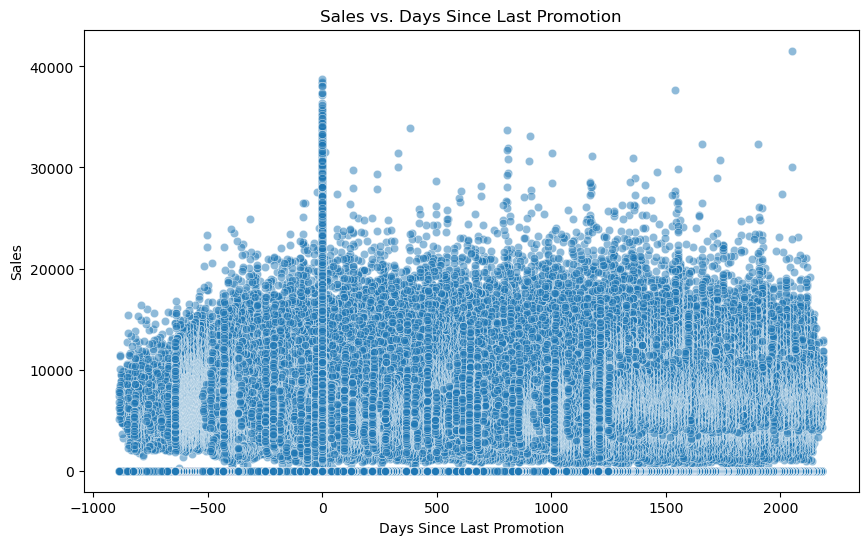

In [12]:

# Step 6.3: Effect of DaysSinceLastPromo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DaysSinceLastPromo', y='Sales', data=train_df, alpha=0.5)
plt.title("Sales vs. Days Since Last Promotion")
plt.xlabel("Days Since Last Promotion")
plt.ylabel("Sales")
plt.show()


Code for Binning and Group Analysis

C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\2926996872.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adjusted_promo_days_sales = train_df.groupby('AdjustedPromoDaysBin')['Sales'].mean().reset_index()
C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\2926996872.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AdjustedPromoDaysBin', y='Sales', data=adjusted_promo_days_sales, palette='viridis')


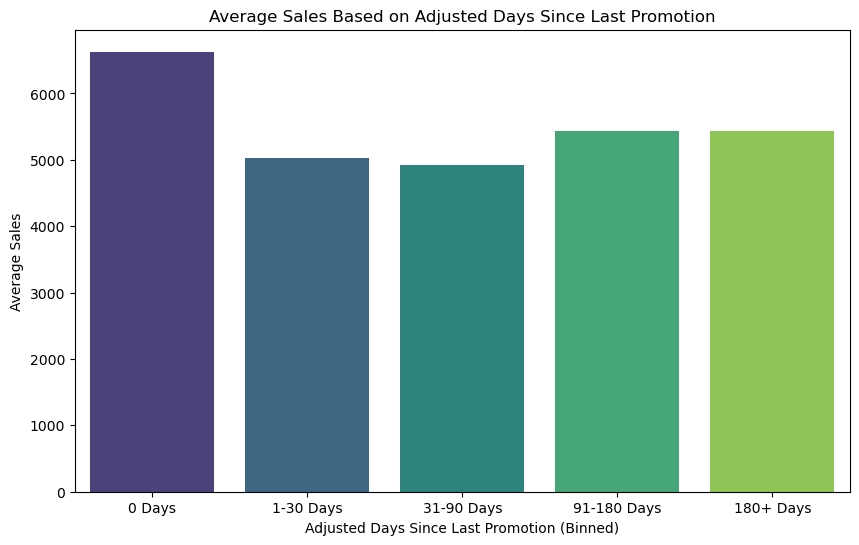

Average Sales by Adjusted Days Since Last Promotion (Binned):
  AdjustedPromoDaysBin        Sales
0               0 Days  6628.335227
1            1-30 Days  5032.682996
2           31-90 Days  4921.793820
3          91-180 Days  5427.445559
4            180+ Days  5436.241119


In [13]:
# Step 1: Combine No Promo with 180+ Days
adjusted_bins = [-1, 0, 30, 90, 180, np.inf]  # Combine 'No Promo' with the largest bin
adjusted_labels = ['0 Days', '1-30 Days', '31-90 Days', '91-180 Days', '180+ Days']

# Create new binned feature
train_df['AdjustedPromoDaysBin'] = pd.cut(train_df['DaysSinceLastPromo'], bins=adjusted_bins, labels=adjusted_labels)

# Step 2: Calculate average sales for each adjusted bin
adjusted_promo_days_sales = train_df.groupby('AdjustedPromoDaysBin')['Sales'].mean().reset_index()

# Step 3: Visualize the adjusted bins

plt.figure(figsize=(10, 6))
sns.barplot(x='AdjustedPromoDaysBin', y='Sales', data=adjusted_promo_days_sales, palette='viridis')
plt.title("Average Sales Based on Adjusted Days Since Last Promotion")
plt.xlabel("Adjusted Days Since Last Promotion (Binned)")
plt.ylabel("Average Sales")
plt.show()

# Reapply binning logic to test_df for AdjustedPromoDaysBin
bins = [-1, 0, 30, 90, 180, np.inf]  # Same bins as used in train_df
labels = ['0 Days', '1-30 Days', '31-90 Days', '91-180 Days', '180+ Days']

# Apply binning and set as categorical
test_df['AdjustedPromoDaysBin'] = pd.cut(train_df['DaysSinceLastPromo'], bins=bins, labels=labels)

# Convert to categorical and encode
test_df['PromoDaysBinEncoded'] = test_df['AdjustedPromoDaysBin'].astype('category').cat.codes

# Step 4: Display the aggregated data for reference
print("Average Sales by Adjusted Days Since Last Promotion (Binned):")
print(adjusted_promo_days_sales)


Feature Engineering


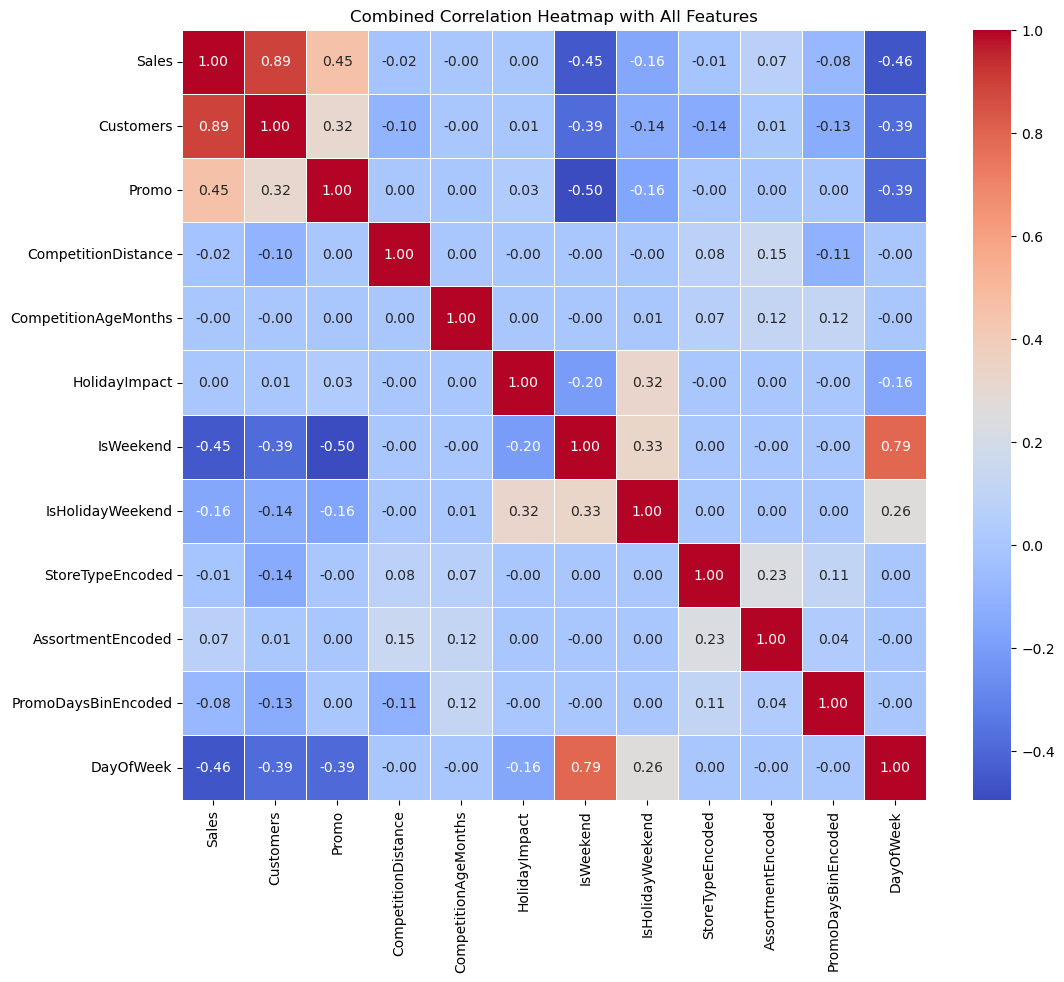

In [14]:
# Step 1: Extract Date-Based Features
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day
train_df['WeekOfYear'] = train_df['Date'].dt.isocalendar().week
train_df['IsWeekend'] = train_df['DayOfWeek'].isin([6, 7]).astype(int)

# Step 2: Create HolidayImpact Feature
train_df['HolidayImpact'] = (train_df['StateHoliday'] != '0').astype(int) | (train_df['SchoolHoliday'])

# Step 3: Competition Features
train_df['CompetitionAgeMonths'] = (
    (train_df['Date'].dt.year - train_df['CompetitionOpenSinceYear'].fillna(0).astype(int)) * 12 +
    (train_df['Date'].dt.month - train_df['CompetitionOpenSinceMonth'].fillna(0).astype(int))
)
train_df['CompetitionAgeMonths'] = train_df['CompetitionAgeMonths'].clip(lower=0)

train_df['IsHolidayWeekend'] = train_df['IsWeekend'] & train_df['HolidayImpact']

# Encode categorical features for correlation
train_df['StoreTypeEncoded'] = train_df['StoreType'].astype('category').cat.codes
train_df['AssortmentEncoded'] = train_df['Assortment'].astype('category').cat.codes
train_df['PromoDaysBinEncoded'] = train_df['AdjustedPromoDaysBin'].cat.codes  # Ordinal encoding for promo bins

#  Consolidate features for correlation
correlation_features = train_df[
    ['Sales', 'Customers', 'Promo', 'CompetitionDistance', 'CompetitionAgeMonths',
     'HolidayImpact', 'IsWeekend', 'IsHolidayWeekend', 'StoreTypeEncoded', 'AssortmentEncoded', 'PromoDaysBinEncoded','DayOfWeek']
]


# Step 4: Compute correlation matrix
correlation_matrix = correlation_features.corr()

# Step 5: Plot the combined heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Combined Correlation Heatmap with All Features")
plt.show()

Creating interaction features and checking correlation


In [15]:
# Interaction Feature 1: Promo × IsWeekend
train_df['Promo_IsWeekend'] = train_df['Promo'] * train_df['IsWeekend']

# Interaction Feature 2: Promo × IsHolidayWeekend
train_df['Promo_IsHolidayWeekend'] = train_df['Promo'] * train_df['IsHolidayWeekend']

# Interaction Feature 3: Promo × StoreTypeEncoded
train_df['Promo_StoreType'] = train_df['Promo'] * train_df['StoreTypeEncoded']

# Verify the new features
print("Sample of Interaction Features:")
print(train_df[['Promo', 'IsWeekend', 'IsHolidayWeekend', 'StoreTypeEncoded',
                'Promo_IsWeekend', 'Promo_IsHolidayWeekend', 'Promo_StoreType']].head())


Sample of Interaction Features:
   Promo  IsWeekend  IsHolidayWeekend  StoreTypeEncoded  Promo_IsWeekend  \
0      1          0                 0                 2                0   
1      1          0                 0                 0                0   
2      1          0                 0                 0                0   
3      1          0                 0                 2                0   
4      1          0                 0                 0                0   

   Promo_IsHolidayWeekend  Promo_StoreType  
0                       0                2  
1                       0                0  
2                       0                0  
3                       0                2  
4                       0                0  


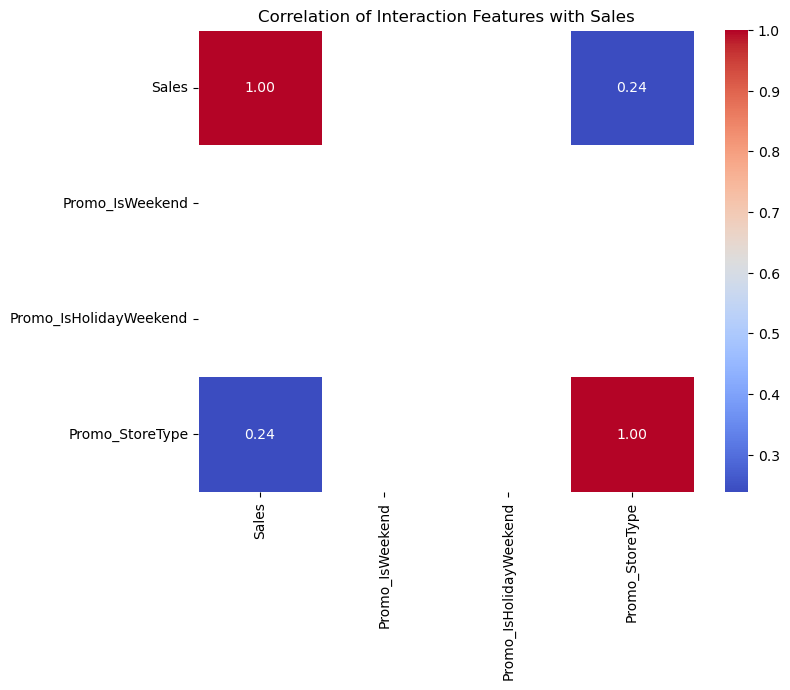

In [16]:
# Add interaction features to the correlation heatmap
interaction_features = train_df[['Sales', 'Promo_IsWeekend', 'Promo_IsHolidayWeekend', 'Promo_StoreType']]

# Compute the correlation matrix
interaction_correlation_matrix = interaction_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(interaction_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation of Interaction Features with Sales")
plt.show()


Feature preparation

In [17]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize the label encoder
label_encoder = LabelEncoder()

# Step 2: Apply label encoding to StateHoliday in train and test datasets
train_df['StateHolidayEncoded'] = label_encoder.fit_transform(train_df['StateHoliday'].astype(str))
test_df['StateHolidayEncoded'] = label_encoder.transform(test_df['StateHoliday'].astype(str))

# Step 3: Verify encoding
print("StateHoliday unique values (train):", train_df['StateHoliday'].unique())
print("Encoded StateHoliday (train):", train_df['StateHolidayEncoded'].unique())
print("StateHoliday unique values (test):", test_df['StateHoliday'].unique())
print("Encoded StateHoliday (test):", test_df['StateHolidayEncoded'].unique())

# Convert the 'Date' column to datetime in both train and test datasets
# train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y-%m-%d', errors='coerce')
# test_df['Date'] = pd.to_datetime(test_df['Date'], format='%Y-%m-%d', errors='coerce')
test_df['Date'] = pd.to_datetime(test_df['Date'])


# Verify the conversion
print("Train DataFrame Date column type:", train_df['Date'].dtype)
print("Test DataFrame Date column type:", test_df['Date'].dtype)


StateHoliday unique values (train): ['0' 'a' 'b' 'c' 0]
Encoded StateHoliday (train): [0 1 2 3]
StateHoliday unique values (test): ['0' 'a']
Encoded StateHoliday (test): [0 1]
Train DataFrame Date column type: datetime64[ns]
Test DataFrame Date column type: datetime64[ns]


C:\Users\gupta\AppData\Local\Temp\ipykernel_55196\436152817.py:19: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test_df['Date'] = pd.to_datetime(test_df['Date'])


In [18]:
# Drop unnecessary features
train_df.drop(columns=['Promo_IsWeekend', 'Promo_IsHolidayWeekend'], inplace=True, errors='ignore')

# Way A: Prepare data ignoring Customers
# Select only relevant encoded and engineered features
selected_features = [
    'Promo',
    'CompetitionDistance',
    'CompetitionAgeMonths',
    'StateHolidayEncoded',
    'StoreTypeEncoded',
    'AssortmentEncoded',
    'DayOfWeek'
]

# Prepare X_train and y_train
X_train_a = train_df[selected_features]
y_train_a = train_df['Sales']

# Ensure the same preprocessing steps for test data as were done for train data
# Step 1: Feature Engineering
test_df['CompetitionAgeMonths'] = (
    (test_df['Date'].dt.year - test_df['CompetitionOpenSinceYear'].fillna(0).astype(int)) * 12 +
    (test_df['Date'].dt.month - test_df['CompetitionOpenSinceMonth'].fillna(0).astype(int))
)


train_df['CompetitionAgeMonths'] = (
    (train_df['Date'].dt.year - train_df['CompetitionOpenSinceYear'].fillna(0).astype(int)) * 12 +
    (train_df['Date'].dt.month - train_df['CompetitionOpenSinceMonth'].fillna(0).astype(int))
)



test_df['CompetitionAgeMonths'] = test_df['CompetitionAgeMonths'].clip(lower=0)

test_df['IsWeekend'] = test_df['DayOfWeek'].isin([6, 7]).astype(int)
test_df['HolidayImpact'] = (test_df['StateHoliday'] != '0').astype(int) | (test_df['SchoolHoliday'])

# Step 2: Encoding Categorical Features
test_df['StateHolidayEncoded'] = label_encoder.transform(test_df['StateHoliday'].astype(str))
test_df['StoreTypeEncoded'] = test_df['StoreType'].astype('category').cat.codes
test_df['AssortmentEncoded'] = test_df['Assortment'].astype('category').cat.codes

# Step 1: Recreate missing date-based features in test_df
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Quarter'] = test_df['Date'].dt.quarter
test_df['MonthName'] = test_df['Date'].dt.strftime('%b')
test_df['Day'] = test_df['Date'].dt.day
test_df['WeekOfYear'] = test_df['Date'].dt.isocalendar().week

# Step 2: Recreate promotional features
test_df['Promo2StartDate'] = pd.to_datetime(
    test_df['Promo2SinceYear'].fillna(0).astype(int).astype(str) + '-' +
    test_df['Promo2SinceWeek'].fillna(0).astype(int).astype(str) + '-1', errors='coerce', format='%Y-%W-%w'
)
test_df['DaysSinceLastPromo'] = (test_df['Date'] - test_df['Promo2StartDate']).dt.days
test_df['DaysSinceLastPromo'] = test_df['DaysSinceLastPromo'].fillna(-1)

# Step 3: Recreate holiday and interaction features
test_df['IsHolidayWeekend'] = test_df['IsWeekend'] & test_df['HolidayImpact']
test_df['Promo_StoreType'] = test_df['Promo'] * test_df['StoreTypeEncoded']

test_df['PromoDaysBin'] = pd.cut(test_df['DaysSinceLastPromo'], bins=bins, labels=labels)

test_df['PromoDaysBinEncoded'] = test_df['AdjustedPromoDaysBin'].cat.codes

# Step 3: Keep Only Relevant Columns
test_features_a = test_df[selected_features]  # Ensure test features match training features

# Step 1: Prepare data to predict Customers
features_customers = [
    'Promo',
    'CompetitionDistance',
    'CompetitionAgeMonths',
    'StateHolidayEncoded',
    'StoreTypeEncoded',
    'AssortmentEncoded',
    'DayOfWeek'
]

# Train and test sets for Customers prediction
X_train_b_customers = train_df[features_customers]
y_train_b_customers = train_df['Customers']
X_test_b_customers = test_df[features_customers]

# Step 2: Prepare data to predict Sales (including predicted Customers)
features_sales_b = features_customers + ['Customers']  # Include Customers for Sales prediction

# Train and test sets for Sales prediction
X_train_b_sales = train_df[features_sales_b]
y_train_b_sales = train_df['Sales']


print("Data prepared for both ways:")
print("Way A features shape:", X_train_a.shape)
print("Way B features (Customers prediction) shape:", X_train_b_customers.shape)


Data prepared for both ways:
Way A features shape: (1017209, 7)
Way B features (Customers prediction) shape: (1017209, 7)


In [20]:
# Step 1: Train the model to predict Customers
rf_customers = RandomForestRegressor(n_estimators=100, random_state=42)
rf_customers.fit(X_train_b_customers, y_train_b_customers)

# Evaluate on training data (optional)
y_train_pred_customers = rf_customers.predict(X_train_b_customers)
train_rmse_customers = np.sqrt(mean_squared_error(y_train_b_customers, y_train_pred_customers))
print(f"Train RMSE for Customers: {train_rmse_customers}")

# Predict Customers for the test set
test_df['Customers'] = rf_customers.predict(X_test_b_customers)
print("Customers predicted for test set. Sample output:")
print(test_df[['Customers']].head())

Train RMSE for Customers: 100.70700478642269
Customers predicted for test set. Sample output:
     Customers
0   544.544048
1   773.035357
2  1217.527548
3   943.744095
4   652.848524


In [21]:
# Add Predicted_Customers to test features for Sales prediction

X_test_b_sales = test_df[features_sales_b]
X_train, X_val, y_train, y_val = train_test_split(X_train_b_sales, y_train_b_sales, test_size=0.2, random_state=42)


# Step 2: Train the model to predict Sales
rf_sales = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sales.fit(X_train, y_train)

# Step 4: Evaluate the model on validation data
y_val_pred = rf_sales.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
print(f"Validation RMSE: {rmse}")
print(f"Validation R^2: {r2}")

# Predict Sales for the test set
test_df['Predicted_Sales'] = rf_sales.predict(X_test_b_sales)
print("Sales predicted for test set. Sample output:")
print(test_df[['Predicted_Sales']].head())


Validation RMSE: 499.99482308704785
Validation R^2: 0.9830956610526129
Sales predicted for test set. Sample output:
   Predicted_Sales
0          4845.07
1          7612.00
2         11969.19
3          8048.63
4          7655.90


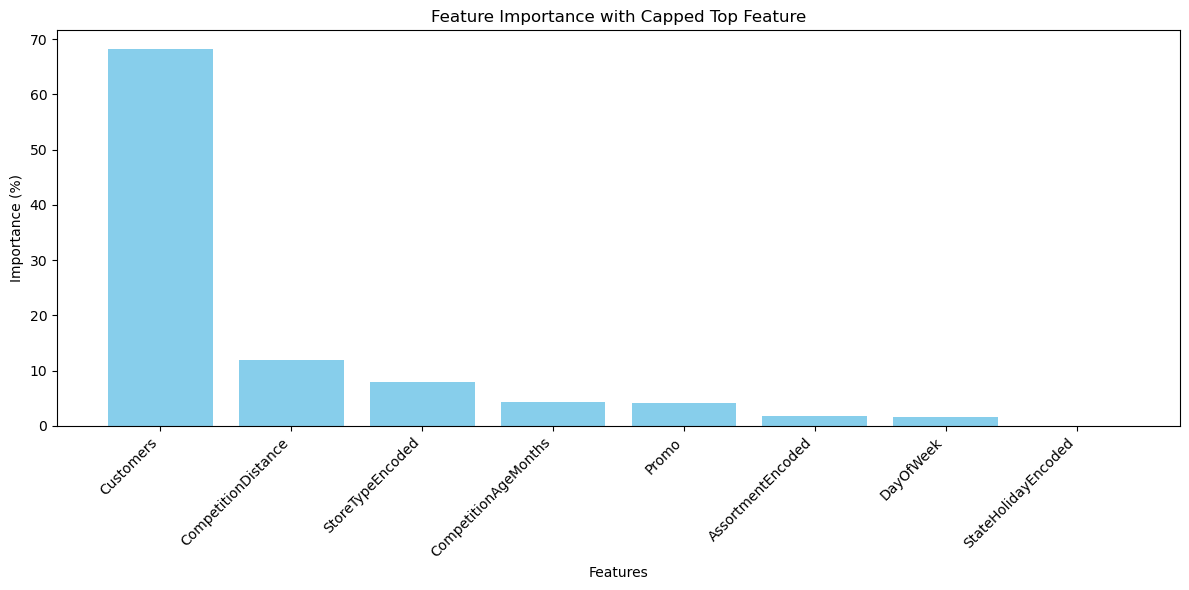

In [22]:
# Get feature importances from the Random Forest model
feature_importances = rf_sales.feature_importances_

# Apply log transformation to feature importances
# Cap the top feature at a predefined value
cap_value = 0.3  # Set cap value (30%)
feature_importances_capped = np.minimum(feature_importances, cap_value)
scaled_importances = feature_importances_capped / np.sum(feature_importances_capped)  # Normalize again
sorted_idx = np.argsort(scaled_importances)[::-1]
sorted_features = X_train.columns[sorted_idx]

# Plot capped feature importances
plt.figure(figsize=(12, 6))
plt.bar(sorted_features, scaled_importances[sorted_idx] * 100, color="skyblue")  # Scaled to percentage
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance with Capped Top Feature")
plt.ylabel("Importance (%)")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


In [24]:

# Step 1: Split the training data for evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a, test_size=0.2, random_state=42)

# Step 2: Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 3: Train the model
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model on validation data
y_val_pred = rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
print(f"Validation RMSE: {rmse}")
print(f"Validation R^2: {r2}")

# Step 5: Train on the full dataset and predict on test data
rf_model.fit(X_train_a, y_train_a)
test_predictions = rf_model.predict(test_features_a)

# Step 6: Prepare the output for test predictions
test_df['Sales'] = test_predictions
print("Test predictions complete. Sample output:")
print(test_df[['Sales']].head())


Validation RMSE: 1327.111765483362
Validation R^2: 0.880908113303419
Test predictions complete. Sample output:
          Sales
0   4995.223274
1   8086.203786
2  11162.057833
3   8300.897333
4   7988.905405


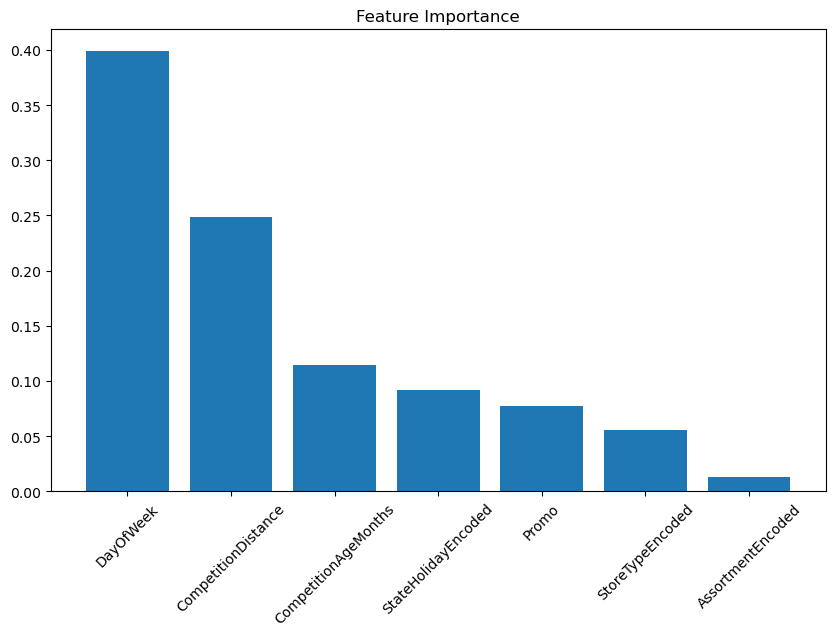

In [25]:
feature_importances = rf_model.feature_importances_
feature_importances
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, feature_importances[sorted_idx])
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()
